In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
 # Lets load the boston house price dataset

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()


In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
housing_data = pd.DataFrame(data.data, columns=data.feature_names)

In [9]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
housing_data["price"] = data.target

In [12]:
df = housing_data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
# Summarizing the stats of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
# checking the missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [16]:
## Exploratory Data Analysis
# 1 Correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


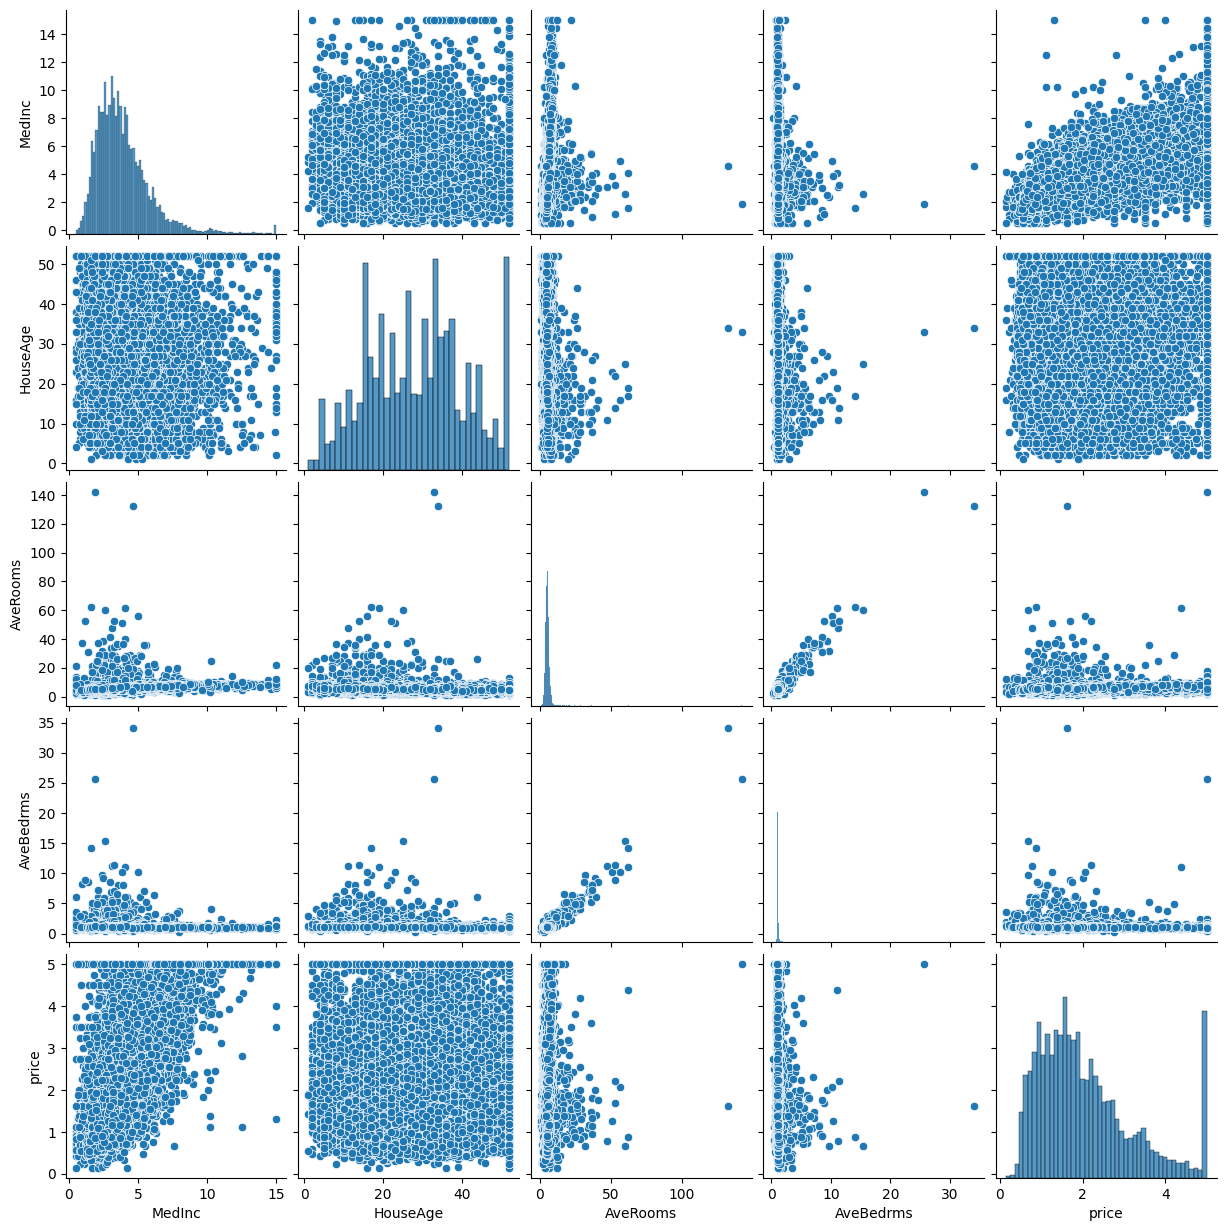

In [17]:
sns.pairplot(df[['MedInc','HouseAge','AveRooms','AveBedrms','price']])

Text(0, 0.5, 'price')

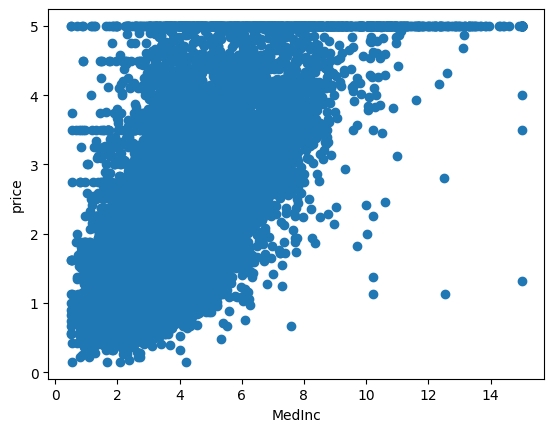

In [18]:
plt.scatter(df['MedInc'],df['price'])
plt.xlabel("MedInc")
plt.ylabel("price")

<Axes: xlabel='AveBedrms', ylabel='price'>

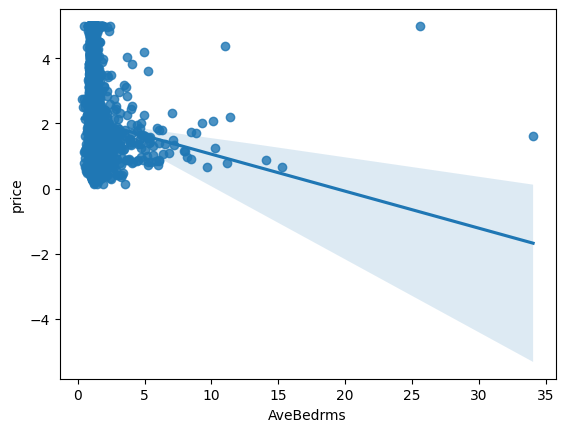

In [19]:
sns.regplot(x='AveBedrms',y='price', data=df)

<Axes: xlabel='HouseAge', ylabel='price'>

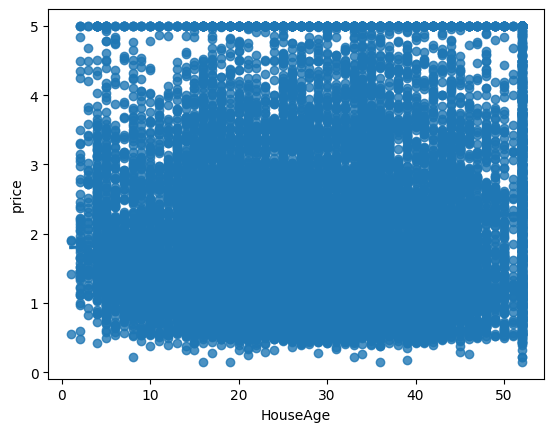

In [20]:
sns.regplot(x='HouseAge',y='price', data=df)

In [21]:
# Independant and Dependant features

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
print(X.head(2))
print(y.head(2))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137    0.97188      2401.0  2.109842     37.86   

   Longitude  
0    -122.23  
1    -122.22  
   price
0  4.526
1  3.585


In [22]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [23]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5748,2.9148,15.0,4.285957,1.105532,3164.0,2.692766,34.16,-118.27
5592,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26
2110,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75
13901,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56
18425,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [24]:
# standardize the datasets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[-0.50715954, -1.07853296, -0.44712678, ..., -0.03473461,
        -0.68811806,  0.64821297],
       [-0.36780162,  0.98848922, -0.40478899, ...,  0.04136812,
        -0.85669979,  0.6531961 ],
       [-0.72098999,  1.62449604, -0.21327712, ..., -0.03379571,
         0.52473385, -0.08929041],
       ...,
       [-1.45114921,  1.06799007, -0.2117232 , ..., -0.03858451,
        -0.79582306,  0.6531961 ],
       [-0.65684615, -1.47603722, -0.17247966, ..., -0.02821367,
        -0.88947957,  1.2013405 ],
       [-0.83089789,  0.5114841 , -0.31691522, ..., -0.04325394,
         1.01174774, -1.31015748]])

In [27]:
# Model Training

from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# print the coefficient
print(regression.coef_)

[[ 0.83265521  0.12186056 -0.2692169   0.31217484 -0.00634786 -0.04074974
  -0.90369005 -0.8787625 ]]


In [30]:
print(regression.intercept_)

[2.07653148]


In [31]:
# on which paramters the model has been train
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
# prediction with test data
reg_pred = regression.predict(X_test)

reg_pred

array([[2.12598355],
       [0.94104495],
       [2.71042934],
       ...,
       [1.85617769],
       [1.54295782],
       [1.51367783]])

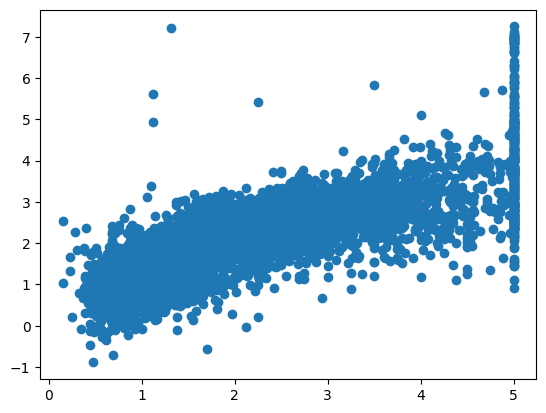

In [33]:
# plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [34]:
# Residuals
residuals = y_test - reg_pred

In [35]:
residuals

,price
4712,1.424016
2151,-0.234045
15927,-0.416429
82,-0.585309
8161,-0.579151
...,...
11387,-0.162307
2523,-0.521052
18897,-0.758178
18878,0.082042


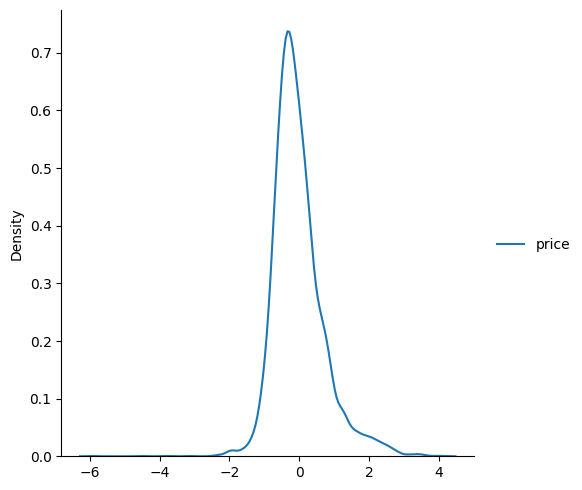

In [36]:
# Ploting residuals
sns.displot(residuals, kind="kde")

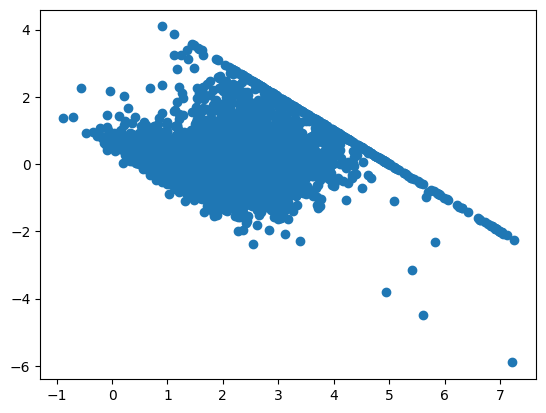

In [37]:
# scatter plot withrespect to prediction and residuals
plt.scatter(x=reg_pred, y=residuals)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(root_mean_squared_error(y_test, reg_pred))


0.5296293151408233
0.5352476763196591
0.7277563569910079


In [39]:
  # R squared and Adjusted R squared

from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.5971429737359629


In [40]:
# Calculate Adjusted R squared
n = X_test.shape[0]  # number of rows
p = X_test.shape[1]  # number of independent variables

adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.5966217289987621


In [41]:
# Prediction with new data
new_row = housing_data.iloc[1:3].drop('price', axis=1)
new_row


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [42]:
scaler.transform(new_row)

array([[ 2.34599654, -0.60152784,  0.31267671, -0.25084161,  0.85980922,
        -0.08176829,  1.04452753, -1.32012374],
       [ 1.79301415,  1.8629986 ,  1.11055207, -0.04845726, -0.82511682,
        -0.02590001,  1.0398447 , -1.33009001]])

In [43]:
regression.predict(scaler.transform(new_row))

array([[4.0081711 ],
       [3.71784262]])

In [44]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [47]:
# pickling the model file for diployment
import pickle

In [48]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [49]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [50]:
pickle_model.predict(scaler.transform(new_row))

array([[4.0081711 ],
       [3.71784262]])